<a href="https://colab.research.google.com/github/kearadennehy/storytelling-with-data/blob/master/data-stories/COVID-19/COVID_Crisis_in_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID Crisis in India

# Install Packages

In [ ]:
# set up system tools
#!apt install mdbtools
!pip install git+https://github.com/ContextLab/davos.git
import davos #this provides the "smuggle" keyword-- used as a more robust version of "import"

  Cloning https://github.com/ContextLab/davos.git to /tmp/pip-req-build-gx1r1c6w
  Running command git clone -q https://github.com/ContextLab/davos.git /tmp/pip-req-build-gx1r1c6w
ERROR: Operation cancelled by user


ModuleNotFoundError: ignored

In [ ]:
smuggle warnings
warnings.simplefilter('ignore')

#number crunching
smuggle numpy as np
smuggle pandas as pd

#data visualization
smuggle plotly # pip: plotly==4.14.3
smuggle plotly.figure_factory as ff
smuggle plotly.graph_objects as go
smuggle plotly.express as px
smuggle seaborn as sns
smuggle bokeh as bk
from matplotlib smuggle pyplot as plt
smuggle plotnine as pn
smuggle hypertools as hyp
smuggle folium as fm
from mpl_toolkits.mplot3d smuggle Axes3D
smuggle plotnine

#machine learning and stats
smuggle scipy as sp
smuggle sklearn as sk
smuggle tensorflow as tf
smuggle statsmodels.api as sm

# work with zipfiles
smuggle zipfile
smuggle os
from glob smuggle glob as lsdir

#work with database files
smuggle csv
from meza smuggle io

#work with remote files
from urllib.request smuggle urlopen

#work with json files
smuggle json

# Data Wrangling

Add to Google Drive:
1. Income: https://docs.google.com/spreadsheets/d/1dsSgGNYBqy7PpAb_MTmCLrydM-K0PEpG3hkkMsO8_Sw/edit?usp=sharing

2. Vaccine: https://docs.google.com/spreadsheets/d/1mF0T0tDfMNCMuzU_K9YgwJGAO_RadyZRoN20oWyJ-cI/edit?usp=sharing

3. Testing: https://docs.google.com/spreadsheets/d/1mx0dWnPBzgVI2BBYHIwHsfEUqDtsHo4t_tpaZ3Ci2xY/edit?usp=sharing

4. GeoJSON: https://drive.google.com/file/d/1hhkiIKG5DJbjnJ-iSZaB9gcdIX90czPN/view?usp=sharing

5. Kerala: https://docs.google.com/spreadsheets/d/1zWdEE6i3ea4x_ENk-4dwtMNNrGzkV-InstJNQCe6-Ts/edit?usp=sharing

6. Kerala vaccines: https://docs.google.com/spreadsheets/d/1QILG0ncZmdMFy97bckdsSxHJlkMH1eRl3DAT8RY--lg/edit?usp=sharing

7. Madhya Pradesh: https://docs.google.com/spreadsheets/d/12n7IFMMn_wUPFiOHVLtKAw9nCPbeqcv8JaZRxCNOpyo/edit?usp=sharing

In [ ]:
import pandas as pd
from google.colab import auth
import gspread
from oauth2client.client import GoogleCredentials

auth.authenticate_user()

gc = gspread.authorize(GoogleCredentials.get_application_default())

incomeworksheet = gc.open('Income By State').sheet1
testingworksheet = gc.open('StatewiseTestingDetails').sheet1
vaccineworksheet = gc.open('covid vaccine statewise').sheet1
keralaworksheet = gc.open('Kerala').sheet1
keralavaccineworksheet = gc.open('kerala vaccine').sheet1
madhyapradeshworksheet = gc.open('Madhya Pradesh').sheet1

# get_all_values gives a list of rows.
incomerows = incomeworksheet.get_all_values()
testingrows = testingworksheet.get_all_values()
vaccinerows = vaccineworksheet.get_all_values()
keralarows = keralaworksheet.get_all_values()
keralavaccinerows = keralavaccineworksheet.get_all_values()
madhyapradeshrows = madhyapradeshworksheet.get_all_values()

KeyboardInterrupt: ignored

In [ ]:
# Convert to DataFrames
income = pd.DataFrame.from_records(incomerows)
testing = pd.DataFrame.from_records(testingrows)
vaccine = pd.DataFrame.from_records(vaccinerows)
kerala = pd.DataFrame.from_records(keralarows)
keralavaccine = pd.DataFrame.from_records(keralavaccinerows)
madhyapradesh = pd.DataFrame.from_records(madhyapradeshrows)

In [ ]:
# set the header of the DF from the first row's values
income.columns = income.iloc[0]
income = income[1:]

testing.columns = testing.iloc[0]
testing = testing[1:]

vaccine.columns = vaccine.iloc[0]
vaccine = vaccine[1:]

kerala.columns = kerala.iloc[0]
kerala = kerala[1:]

keralavaccine.columns = keralavaccine.iloc[0]
keralavaccine = keralavaccine[1:]

madhyapradesh.columns = madhyapradesh.iloc[0]
madhyapradesh = madhyapradesh[1:]

In [ ]:
income.head()

In [ ]:
testing.head()

In [ ]:
vaccine.head()

In [ ]:
kerala.head()

In [ ]:
keralavaccine.head()

In [ ]:
madhyapradesh.head()

In [ ]:
# Filter dataframes
state_list = list(income["State"].unique())  # creates a list of states from the income DF
vaccine2 = vaccine[(vaccine['Updated On'] == "25/04/2021") & vaccine.State.isin(state_list)].copy()
testing2 = testing[testing.State.isin(state_list)].copy()  # filter for May 1st and within the list of states

In [ ]:
# Join dataframes
df1 = income.merge(vaccine2[["State", "Total Individuals Vaccinated"]], how='left', on='State')
covid = df1.merge(testing2, how='left', on='State')

kerala = kerala.merge(keralavaccine, how='left', on='District')

In [ ]:
# Create calculated columns
covid['Per capita income in rupees'] = covid['Per capita income in rupees'].astype(int)
covid['Cases per 100,000'] = ((covid["Positive Cases (Today)"].astype(int) / covid["Population"].astype(int)) * 100000).astype(int)
covid['Vaccines per 100,000'] = ((covid["Total Individuals Vaccinated"].astype(int) / covid["Population"].astype(int)) * 100000).astype(int)

kerala['Cases per 100,000'] = ((kerala["Cases"].astype(int) / kerala["Population"].astype(int)) * 100000).astype(int)
kerala['Vaccines per 100,000'] = ((kerala["Total Individuals Vaccinated"].astype(int) / kerala["Population"].astype(int)) * 100000).astype(int)
kerala['Per capita income in rupees'] = kerala['Per capita income in rupees'].astype(int)

madhyapradesh['Cases per 100,000'] = ((madhyapradesh["Cases"].astype(int) / madhyapradesh["Population"].astype(int)) * 100000).astype(int)
madhyapradesh['Vaccines per 100,000'] = ((madhyapradesh["Total Individuals Vaccinated"].astype(int) / madhyapradesh["Population"].astype(int)) * 100000).astype(int)
madhyapradesh['Per capita income in rupees'] = madhyapradesh['Per capita income in rupees'].astype(int)


In [ ]:
covid.head()

In [ ]:
kerala.head()

In [ ]:
madhyapradesh.head()

# Visualizations

In [ ]:
from plotnine import *

## Country-Level

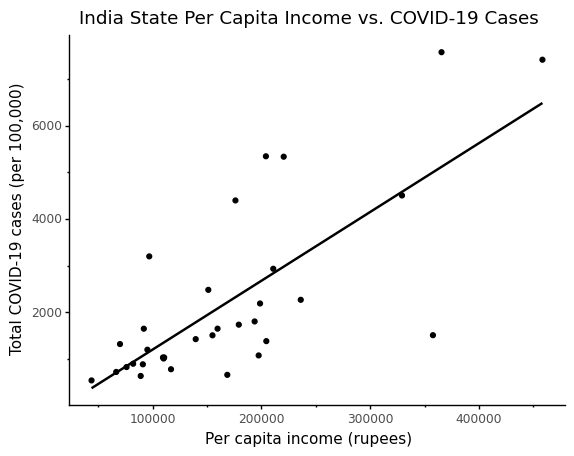

<ggplot: (8775444005337)>

In [ ]:
(ggplot(covid)
 + aes(x='Per capita income in rupees', y = 'Cases per 100,000')
 + geom_point()
 + geom_smooth(method="lm", se=False)
 + theme_classic()
 + labs(title='India State Per Capita Income vs. COVID-19 Cases', x='Per capita income (rupees)', y='Total COVID-19 cases (per 100,000)')
) 

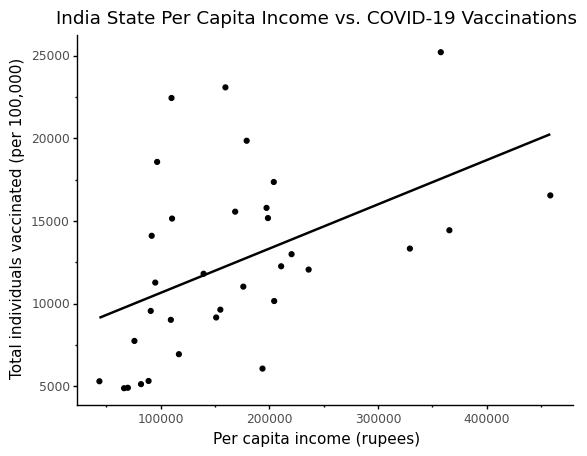

<ggplot: (8775444209209)>

In [ ]:
(ggplot(covid)
 + aes(x='Per capita income in rupees', y = 'Vaccines per 100,000')
 + geom_point()
 + geom_smooth(method="lm", se=False)
 + theme_classic()
 + labs(title='India State Per Capita Income vs. COVID-19 Vaccinations', x='Per capita income (rupees)', y='Total individuals vaccinated (per 100,000)')
) 

## Madhya Pradesh State-Level



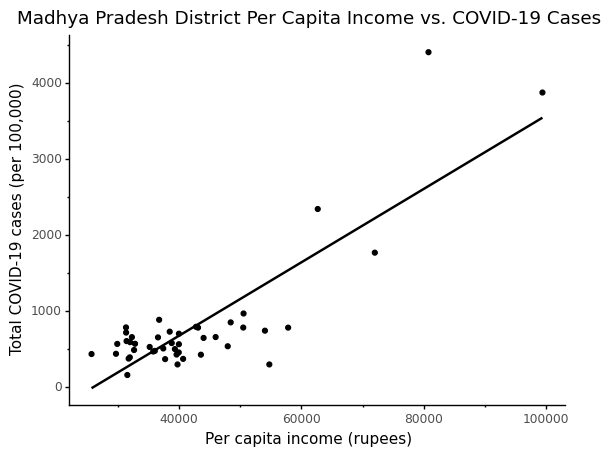

<ggplot: (8775444076357)>

In [ ]:
(ggplot(madhyapradesh)
 + aes(x='Per capita income in rupees', y = 'Cases per 100,000')
 + geom_point()
 + geom_smooth(method="lm", se=False)
 + theme_classic()
 + labs(title='Madhya Pradesh District Per Capita Income vs. COVID-19 Cases', x='Per capita income (rupees)', y='Total COVID-19 cases (per 100,000)')
) 

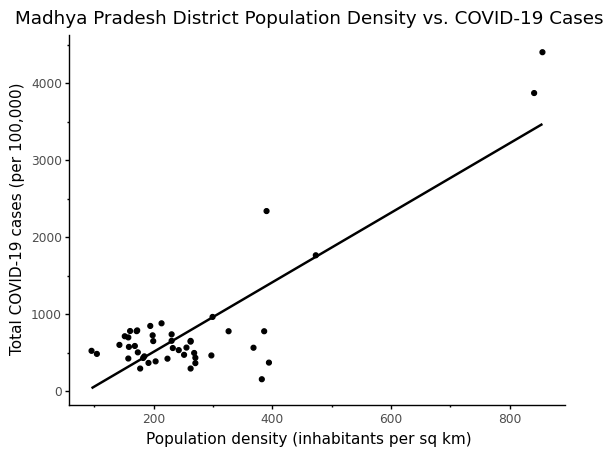

<ggplot: (8775443897265)>

In [ ]:
madhyapradesh['Population density (per sq km)'] = madhyapradesh['Population density (per sq km)'].apply(float)
(ggplot(madhyapradesh)
 + aes(x='Population density (per sq km)', y = 'Cases per 100,000')
 + geom_point()
 + geom_smooth(method="lm", se=False)
 + theme_classic()
 + labs(title='Madhya Pradesh District Population Density vs. COVID-19 Cases', x='Population density (inhabitants per sq km)', y='Total COVID-19 cases (per 100,000)')
) 

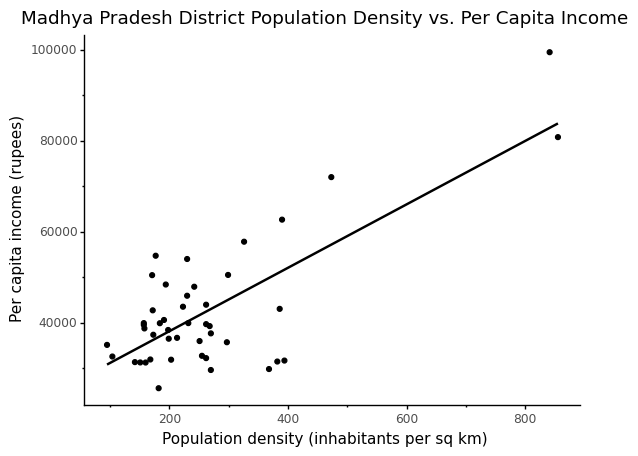

<ggplot: (8775481010949)>

In [ ]:
(ggplot(madhyapradesh)
 + aes(x='Population density (per sq km)', y = 'Per capita income in rupees')
 + geom_point()
 + geom_smooth(method="lm", se=False)
 + theme_classic()
 + labs(title='Madhya Pradesh District Population Density vs. Per Capita Income', x='Population density (inhabitants per sq km)', y='Per capita income (rupees)')
) 

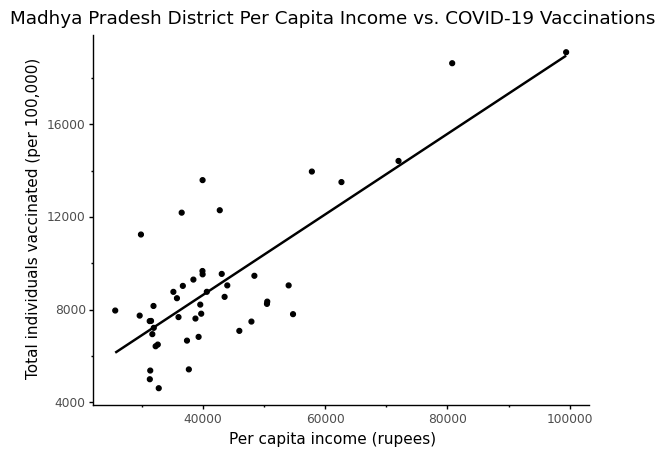

<ggplot: (8775444076265)>

In [ ]:
(ggplot(madhyapradesh)
 + aes(x='Per capita income in rupees', y = 'Vaccines per 100,000')
 + geom_point()
 + geom_smooth(method="lm", se=False)
 + theme_classic()
 + labs(title='Madhya Pradesh District Per Capita Income vs. COVID-19 Vaccinations', x='Per capita income (rupees)', y='Total individuals vaccinated (per 100,000)')
) 

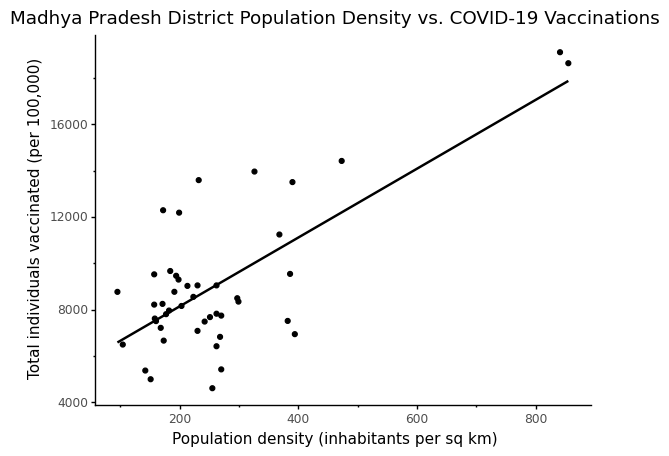

<ggplot: (8775480994509)>

In [ ]:
(ggplot(madhyapradesh)
 + aes(x='Population density (per sq km)', y = 'Vaccines per 100,000')
 + geom_point()
 + geom_smooth(method="lm", se=False)
 + theme_classic()
 + labs(title='Madhya Pradesh District Population Density vs. COVID-19 Vaccinations', x='Population density (inhabitants per sq km)', y='Total individuals vaccinated (per 100,000)')
) 

## Kerala State-Level

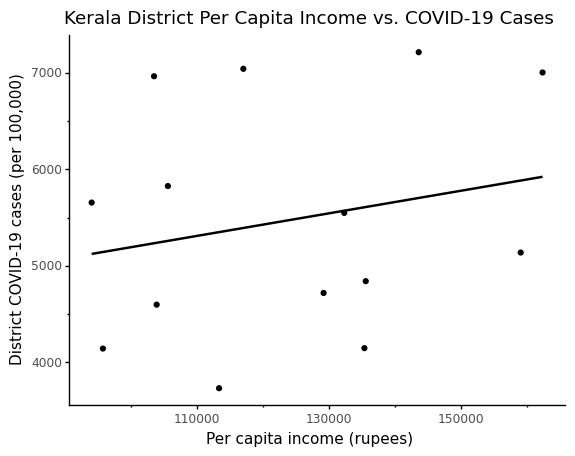

<ggplot: (8775443998533)>

In [ ]:
(ggplot(kerala)
 + aes(x='Per capita income in rupees', y = 'Cases per 100,000')
 + geom_point()
 + geom_smooth(method="lm", se=False)
 + theme_classic()
 + labs(title='Kerala District Per Capita Income vs. COVID-19 Cases', x='Per capita income (rupees)', y='District COVID-19 cases (per 100,000)')
) 

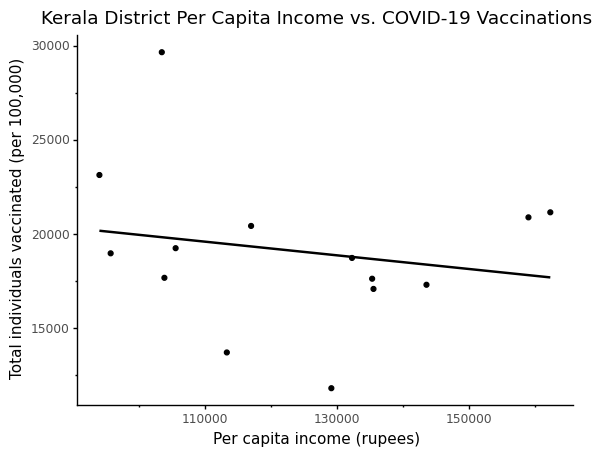

<ggplot: (8775480923317)>

In [ ]:
(ggplot(kerala)
 + aes(x='Per capita income in rupees', y = 'Vaccines per 100,000')
 + geom_point()
 + geom_smooth(method="lm", se=False)
 + theme_classic()
 + labs(title='Kerala District Per Capita Income vs. COVID-19 Vaccinations', x='Per capita income (rupees)', y='Total individuals vaccinated (per 100,000)')
) 

# Maps

In [ ]:
import json
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

downloaded = drive.CreateFile({'id':"1hhkiIKG5DJbjnJ-iSZaB9gcdIX90czPN"})   # replace the id with id of file you want to access
downloaded.GetContentFile('states_india.json')        # replace the file name with your file


In [ ]:
from urllib.request import urlopen
import json
states = open("states_india.json", 'r')
india = json.load(states)


## Country-Level

In [ ]:
#tutorial here:
#https://plotly.com/python/mapbox-county-choropleth/

income['Per capita income in rupees'] = income['Per capita income in rupees'].apply(int)

fig = px.choropleth_mapbox(data_frame=income, geojson=india, 
                           color='Per capita income in rupees', 
                           featureidkey='properties.st_nm',
                           locations='State',
                           color_continuous_scale="Viridis",
                           #range_color=(0, 12),
                           mapbox_style="carto-positron",
                           zoom=3.5, center = {"lat": 20.5937, "lon": 78.9629},
                           opacity=0.5,
                           labels={'Per capita income in rupees':'Per capita income'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
fig2 = px.choropleth_mapbox(data_frame=covid, geojson=india, 
                            color='Vaccines per 100,000', 
                           featureidkey='properties.st_nm',
                           locations='State',
                           color_continuous_scale="Viridis",
                           #range_color=(0, 12),
                           mapbox_style="carto-positron",
                           zoom=3.5, center = {"lat": 20.5937, "lon": 78.9629},
                           opacity=0.5,
                           labels={'Vaccines per 100,000':'Vaccines Per 100,000'}
                          )
fig2.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig2.show()

In [ ]:
fig3 = px.choropleth_mapbox(data_frame=covid, geojson=india, 
                            color='Cases per 100,000', 
                           featureidkey='properties.st_nm',
                           locations='State',
                           color_continuous_scale="Viridis",
                           #range_color=(0, 12),
                           mapbox_style="carto-positron",
                           zoom=3.5, center = {"lat": 20.5937, "lon": 78.9629},
                           opacity=0.5,
                           labels={'Cases per 100,000':'Cases per 100,000'}#,
                            #animation_frame='date'
                          )
fig3.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig3.show()

## Kerala State-Level

In [ ]:
kerala_map = drive.CreateFile({'id' : "1eY_IRueR9-a0PWUh8RFIQ0sbwJL9dSj-"})
kerala_map.GetContentFile('district.geojson')

In [ ]:
districts = open("district.geojson", 'r')
kerala_map = json.load(districts)

In [ ]:
fig4 = px.choropleth_mapbox(data_frame=kerala, geojson=kerala_map, 
                            color='Per capita income in rupees', 
                           featureidkey='properties.DISTRICT',
                           locations='District',
                           color_continuous_scale="Viridis",
                           #range_color=(0, 12),
                           mapbox_style="carto-positron",
                           zoom=5, center = {"lat": 10.5, "lon": 78.9629},
                           opacity=0.5,
                           labels={'Per capita income in rupees':'Per capita income'}#,
                            #animation_frame='date'
                          )
fig4.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig4.show()

In [ ]:
kerala['Population density (inhabitants per km squared)'] = kerala['Population density (inhabitants per km squared)'].apply(float)
fig5 = px.choropleth_mapbox(data_frame=kerala, geojson=kerala_map, 
                            color='Population density (inhabitants per km squared)', 
                           featureidkey='properties.DISTRICT',
                           locations='District',
                           color_continuous_scale="Viridis",
                           #range_color=(0, 12),
                           mapbox_style="carto-positron",
                           zoom=5, center = {"lat": 10.5, "lon": 78.9629},
                           opacity=0.5,
                           labels={'Population density (inhabitants per km squared)':'Population density (inhabitants per sq km)'}#,
                            #animation_frame='date'
                          )
fig5.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig5.show()

In [ ]:
kerala.head()

,District,Cases,Cured,Active,Deaths,Per capita income in rupees,Population,"Cases per 100,000"
1,Alappuzha,124018,100125,23402,460,105555,2127789,5828
2,Ernakulam,229945,164568,64821,517,162297,3282388,7005
3,Idukki,51012,34106,16848,52,103855,1108974,4599
4,Kannur,104674,77895,26300,442,135316,2523003,4148
5,Kasaragod,54182,38342,15708,123,95715,1307375,4144


In [ ]:
fig6 = px.choropleth_mapbox(data_frame=kerala, geojson=kerala_map, 
                            color='Cases per 100,000', 
                           featureidkey='properties.DISTRICT',
                           locations='District',
                           color_continuous_scale="Viridis",
                           #range_color=(0, 12),
                           mapbox_style="carto-positron",
                           zoom=5, center = {"lat": 10.5, "lon": 78.9629},
                           opacity=0.5,
                           labels={'Cases per 100,000':'Cases per 100,000'}#,
                            #animation_frame='date'
                          )
fig6.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig6.show()

In [ ]:
fig7 = px.choropleth_mapbox(data_frame=kerala, geojson=kerala_map, 
                            color='Vaccines per 100,000', 
                           featureidkey='properties.DISTRICT',
                           locations='District',
                           color_continuous_scale="Viridis",
                           #range_color=(0, 12),
                           mapbox_style="carto-positron",
                           zoom=5, center = {"lat": 10.5, "lon": 78.9629},
                           opacity=0.5,
                           labels={'Vaccines per 100,000':'Vaccines per 100,000'}#,
                            #animation_frame='date'
                          )
fig7.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig7.show()

In [ ]:
print(india.items())

dict_items([('type', 'FeatureCollection'), ('features', [{'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[80.274848, 18.722437], [80.113756, 18.681845], [80.053476, 18.725084], [80.019407, 18.770813], [79.938959, 18.788346], [79.900918, 18.834639], [79.945944, 18.862689], [79.947856, 18.941327], [79.932841, 19.045964], [79.866373, 19.038035], [79.864814, 19.10739], [79.949254, 19.179151], [79.926948, 19.229569], [79.968578, 19.300578], [79.979804, 19.403952], [79.917712, 19.495049], [79.8348, 19.539544], [79.823154, 19.571483], [79.746805, 19.605472], [79.719383, 19.585657], [79.627763, 19.567353], [79.597697, 19.504046], [79.548958, 19.550705], [79.476658, 19.499625], [79.310843, 19.591996], [79.243023, 19.611234], [79.256049, 19.57949], [79.221639, 19.512457], [79.22466, 19.466447], [79.174978, 19.469654], [79.108638, 19.529668], [79.024018, 19.541568], [78.983456, 19.581438], [78.97453, 19.650617], [78.921413, 19.669038], [78.864228, 19.657568], [78.851016, 19.7